### Load Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import *
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer as SI
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


### Load dataset and preprocess

In [2]:
house_train_data = pd.read_csv('train.csv', na_values=[''])
house_test_data = pd.read_csv('test.csv', na_values=[''])

house_data = pd.concat([house_train_data, house_test_data], axis = 0, sort=False)
train_id = house_train_data['Id']
test_id = house_test_data['Id']
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [3]:
house_train_data
train_id

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

In [4]:
house_test_data
test_id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

#### Handling missing data - categorical variables

In [6]:
missing_values_objects = house_data.select_dtypes(include='object').isnull().sum()[house_data.select_dtypes(include='object').isnull().sum()>0]

print(missing_values_objects)

missing_values_objects_columns = list(missing_values_objects.index)

print(missing_values_objects_columns)


MSZoning           4
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64
['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [7]:
NA_columns = list(['MSZoning','Exterior1st','Exterior2nd','KitchenQual','SaleType','Functional'])
missing_values_objects_columns_None = [x for x in missing_values_objects_columns if x not in NA_columns]

for column in missing_values_objects_columns_None:
    house_data[column].replace(np.nan , 'None' , inplace = True)

for column in NA_columns:
    house_data[column].replace(np.nan, house_data[column].mode()[0] , inplace = True)



In [8]:
house_data.select_dtypes(include='object').isnull().sum()[house_data.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

#### missing data - numerical variables


In [9]:
missing_values_numeric = house_data.select_dtypes(include=['float64','int64']).isnull().sum()[house_data.select_dtypes(include=['float64','int64']).isnull().sum()>0]

print(missing_values_numeric)

missing_values_numeric_columns = list(missing_values_numeric.index)

print(missing_values_numeric_columns)

LotFrontage      486
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SalePrice       1459
dtype: int64
['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [10]:
NA_columns = list(['LotFrontage'])
missing_values_numeric_columns_None = [x for x in missing_values_numeric_columns if x not in NA_columns]

for column in missing_values_numeric_columns_None:
    house_data[column].replace(np.nan,  0 , inplace = True)


for column in NA_columns:
    house_data[column].replace(np.nan, house_data[column].mean()  , inplace = True)
    



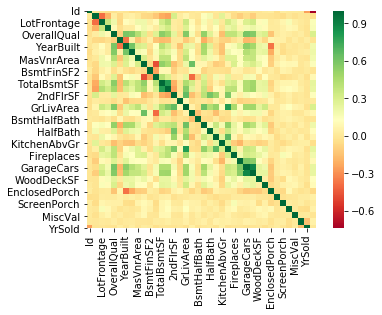

In [11]:
# sns.pairplot(house_data)
sns.heatmap(house_data.corr(),square=True, cmap='RdYlGn')


In [12]:
len(house_data.isnull().sum()[house_data.isnull().sum()>0])


0

In [13]:

house_data['MSSubClass'] = house_data['MSSubClass'].astype(str)

house_data['OverallCond'] = house_data['OverallCond'].astype(str)

house_data['YrSold'] = house_data['YrSold'].astype(str)

house_data['MoSold'] = house_data['MoSold'].astype(str)


In [14]:
house_data['Id'].dtype

dtype('int64')

In [15]:
### handling categorical features 

house_data_dummies = pd.get_dummies(house_data, drop_first=True)
house_data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 297 entries, Id to SaleCondition_Partial
dtypes: float64(12), int64(22), uint8(263)
memory usage: 1.5 MB


In [16]:
house_data_for_train = house_data_dummies.iloc[ : len(train_id) ,  1: ]
house_data_for_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 296 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(12), int64(21), uint8(263)
memory usage: 762.8 KB


In [17]:
print(len(house_data_for_train.isnull().sum()[house_data_for_train.isnull().sum()>0]) )
house_data_for_train

0


,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,2003,2003,196.0,706.0,0.0,150.0,856.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,1976,1976,0.0,978.0,0.0,284.0,1262.0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,2001,2002,162.0,486.0,0.0,434.0,920.0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,1915,1970,0.0,216.0,0.0,540.0,756.0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,2000,2000,350.0,655.0,0.0,490.0,1145.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,2000,0.0,0.0,0.0,953.0,953.0,...,0,0,0,0,1,0,0,0,1,0
1456,85.0,13175,6,1978,1988,119.0,790.0,163.0,589.0,1542.0,...,0,0,0,0,1,0,0,0,1,0
1457,66.0,9042,7,1941,2006,0.0,275.0,0.0,877.0,1152.0,...,0,0,0,0,1,0,0,0,1,0
1458,68.0,9717,5,1950,1996,0.0,49.0,1029.0,0.0,1078.0,...,0,0,0,0,1,0,0,0,1,0


In [18]:
house_data_for_test = house_data_dummies.iloc[len(train_id) : ,  1: ]
print(len(house_data_for_train.isnull().sum()[house_data_for_train.isnull().sum()>0]) )
X_test = house_data_for_test.drop('SalePrice', axis= 1).values
X_test

0


array([[8.0000e+01, 1.1622e+04, 5.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [8.1000e+01, 1.4267e+04, 6.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [7.4000e+01, 1.3830e+04, 5.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [1.6000e+02, 2.0000e+04, 5.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [6.2000e+01, 1.0441e+04, 5.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [7.4000e+01, 9.6270e+03, 7.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

### Model 

In [19]:
### RMSE 
# Compute rmse_test
def RSME(y_train, y_pred):
    rmse = (mean_squared_error(y_train, y_pred))**(1/2)
    return rmse
    

In [20]:
all_columns = house_data_for_train.columns
response = ['SalePrice']
features = [x for x in all_columns if x not in response]

X = house_data_for_train.loc[ : , features].values
y = house_data_for_train.loc[: , response].values

In [21]:
X.shape

(1460, 295)

In [22]:
X

array([[6.500e+01, 8.450e+03, 7.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [8.000e+01, 9.600e+03, 6.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [6.800e+01, 1.125e+04, 7.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [6.600e+01, 9.042e+03, 7.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [6.800e+01, 9.717e+03, 5.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [7.500e+01, 9.937e+03, 5.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [23]:
y.shape

(1460, 1)

In [24]:
y

array([[208500.],
       [181500.],
       [223500.],
       ...,
       [266500.],
       [142125.],
       [147500.]])

In [25]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X)
X_standard = X_scaler.transform(X)
y_scaler = StandardScaler()
y_standard = y_scaler.fit_transform(y)

[180921.19589041]
[79415.29188607]
[[ 0.34727322]
 [ 0.00728832]
 [ 0.53615372]
 ...
 [ 1.07761115]
 [-0.48852299]
 [-0.42084081]]


(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([-1.83870376, -0.93195144, -0.02519913,  0.88155319,  1.78830551,
         2.69505783,  3.60181015,  4.50856246,  5.41531478,  6.3220671 ,
         7.22881942]),
 <a list of 10 Patch objects>)

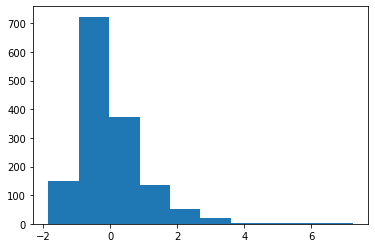

In [26]:
print(y_scaler.mean_)
print(np.sqrt(y_scaler.var_) )
y_train = y_standard
print(y_train)
plt.hist(y_train)

In [27]:
print(X_scaler.mean_)
print(np.sqrt(X_scaler.var_))
X_train = X_standard
X_train

[6.99179459e+01 1.05168281e+04 6.09931507e+00 1.97126781e+03
 1.98486575e+03 1.03117123e+02 4.43639726e+02 4.65493151e+01
 5.67240411e+02 1.05742945e+03 1.16262671e+03 3.46992466e+02
 5.84452055e+00 1.51546370e+03 4.25342466e-01 5.75342466e-02
 1.56506849e+00 3.82876712e-01 2.86643836e+00 1.04657534e+00
 6.51780822e+00 6.13013699e-01 1.86873973e+03 1.76712329e+00
 4.72980137e+02 9.42445205e+01 4.66602740e+01 2.19541096e+01
 3.40958904e+00 1.50609589e+01 2.75890411e+00 4.34890411e+01
 0.00000000e+00 4.31506849e-02 6.84931507e-03 2.05479452e-02
 3.67123288e-01 4.72602740e-02 2.73972603e-03 8.21917808e-03
 9.86301370e-02 2.04794521e-01 4.10958904e-02 1.09589041e-02
 3.97260274e-02 1.36986301e-02 3.56164384e-02 4.45205479e-02
 1.09589041e-02 7.88356164e-01 1.49315068e-01 9.95890411e-01
 9.37671233e-01 2.80821918e-02 2.80821918e-02 6.84931507e-03
 6.33561644e-01 3.42465753e-02 2.46575342e-02 8.97945205e-01
 6.84931507e-04 0.00000000e+00 6.43835616e-02 3.21917808e-02
 2.73972603e-03 7.205479

array([[-0.22335706, -0.20714171,  0.65147924, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.45789401, -0.09188637, -0.07183611, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08710685,  0.07347998,  0.65147924, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [-0.17794032, -0.14781027,  0.65147924, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08710685, -0.08016039, -0.79515147, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.23081032, -0.05811155, -0.79515147, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [28]:
X_test_standard = X_scaler.transform(X_test)
X_test_standard

array([[ 0.45789401,  0.11076257, -0.79515147, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.50331075,  0.37584985, -0.07183611, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.18539358,  0.33205282, -0.79515147, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [ 4.09123304,  0.95042275, -0.79515147, ..., -0.11785113,
        -2.13834494, -0.30599503],
       [-0.35960727, -0.00759964, -0.79515147, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.18539358, -0.08918038,  0.65147924, ..., -0.11785113,
         0.4676514 , -0.30599503]])

### Linear regression

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
lr_train_mse = mean_squared_error(y_train, y_pred)
lr_train_mse

0.06516172205367643

In [30]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [31]:
### one way of doing cross validation
from sklearn.model_selection import cross_val_score

lreg = LinearRegression()

lr_cv_scores = -cross_val_score(lreg ,X_train, y_train, scoring='neg_mean_squared_error',
                      cv=10, n_jobs = -1)

lr_cv_mse = (np.sum(lr_cv_scores) )/ 10

print('Cross-validation MSE : {}' . format(lr_cv_mse))
print('Training MSE : {}' . format(lr_train_mse))


Cross-validation MSE : 8.659714186839386e+21
Training MSE : 0.06516172205367643


In [32]:
### other way of doing cross validation
steps = [('Linear_regressor', LinearRegression())]
pipeline = Pipeline(steps)

parameters = {'Linear_regressor__fit_intercept' : [True]}

lr_cv = GridSearchCV(pipeline ,scoring='neg_mean_squared_error' ,  param_grid=parameters, cv= 10, n_jobs = -1)

lr_cv.fit(X_train, y_train)

print(np.sqrt( -lr_cv.best_score_) )

lr_best_model = lr_cv.best_estimator_
lr_y_train_pred = lr_best_model.predict(X_train)
lr_bestmodel_train_mse = mean_squared_error(y_train, lr_y_train_pred)
print(np.sqrt(lr_bestmodel_train_mse) )

93057585326.71791
0.2552679416880945


cv error > training error which shows the overfitting of model

### Lasso Regression (L1 norm)

In [33]:
from sklearn.linear_model import Lasso


steps = [('lasso_Regressor', Lasso(normalize=True, random_state = 10))]
pipeline = Pipeline(steps)

parameters = {'lasso_Regressor__alpha' : np.logspace(-5, 0 , 100) }

lasso_cv = GridSearchCV(pipeline ,scoring='neg_mean_squared_error' ,  param_grid= parameters, cv= 10, n_jobs = -1)

lasso_cv.fit(X_train, y_train)

print(lasso_cv.best_params_)

print('Lasso regressor Cross-validation error: {}' .format(np.sqrt(-lasso_cv.best_score_) ) )

lasso_cv_best_model = lasso_cv.best_estimator_
lasso_y_train_pred = lasso_cv_best_model.predict(X_train)

### ----- or use following line instead of above 2 lines of code ------
# lasso_y_train_pred = lasso_cv.predict(X_train)
### ---------------
lasso_train_mse = mean_squared_error(y_train,lasso_y_train_pred )

print('Lasso regressor training error: {}' .format(np.sqrt(lasso_train_mse) ) )


{'lasso_Regressor__alpha': 0.00032745491628777284}
Lasso regressor Cross-validation error: 0.4296162471963255
Lasso regressor training error: 0.3329287352716926


In [34]:
house_pred_lasso = lasso_cv_best_model.predict(X_test_standard)
house_predictions_lasso = y_scaler.inverse_transform(house_pred_lasso)
house_prediction_lasso = pd.DataFrame(house_predictions_lasso, columns=['SalePrice'])
house_prediction_lasso_df = pd.concat([test_id ,house_prediction_lasso], axis = 1)
print(house_prediction_lasso_df)
house_prediction_lasso_df.to_csv(r'house_predictions_lasso.csv', index=False)

        Id      SalePrice
0     1461  108677.196205
1     1462  158491.447656
2     1463  174223.898481
3     1464  193624.353280
4     1465  216795.117254
...    ...            ...
1454  2915   71839.563516
1455  2916   82280.596758
1456  2917  172993.845447
1457  2918  112915.903824
1458  2919  225633.404868

[1459 rows x 2 columns]


 High variance

### Ridge 

In [35]:
from sklearn.linear_model import Ridge


steps = [('ridge_Regressor', Ridge(normalize=True, random_state = 10))]
pipeline = Pipeline(steps)

parameters = {'ridge_Regressor__alpha' : np.logspace(-3, 3 , 100) }

ridge_cv = GridSearchCV(pipeline ,scoring='neg_mean_squared_error' ,  param_grid= parameters, cv= 10, n_jobs = -1)

ridge_cv.fit(X_train, y_train)

print(ridge_cv.best_params_)

print('Ridge regressor Cross-validation error: {}' .format(np.sqrt(-ridge_cv.best_score_) ) )

ridge_cv_best_model = ridge_cv.best_estimator_
ridge_y_train_pred = ridge_cv_best_model.predict(X_train)

### ----- or use following line instead of above 2 lines of code ------
# ridge_y_train_pred = ridge_cv.predict(X_train)
### ---------------
ridge_train_mse = mean_squared_error(y_train, ridge_y_train_pred )

print('Ridge regressor training error: {}' .format(np.sqrt(ridge_train_mse) ) )

{'ridge_Regressor__alpha': 8.697490026177835}
Ridge regressor Cross-validation error: 0.6442280906073876
Ridge regressor training error: 0.5732893566513935


Medium variance

### DecisionTreeRegressor

In [36]:
dtr = DecisionTreeRegressor(max_depth = 3 ,min_samples_leaf = 0.2 , random_state = 11)

dtr.fit(X_train, y_train)
dtr_y_pred = dtr.predict(X_train)
dtr_base_mse = mean_squared_error(y_train, dtr_y_pred)
print(dtr_base_mse)



0.5279284131648425


In [37]:
dtr.get_params()

{'criterion': 'mse',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 0.2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 11,
 'splitter': 'best'}

#### Cross validation for best model

In [43]:

steps = [('Decision_Tree_Regressor', DecisionTreeRegressor(random_state = 10))]
pipeline = Pipeline(steps)

parameters = {'Decision_Tree_Regressor__max_depth' : np.linspace(1,30,30) ,
             'Decision_Tree_Regressor__min_samples_leaf' : [0.001,0.005, 0.1,0.2] }

dtr_cv = GridSearchCV(pipeline ,scoring='neg_mean_squared_error' ,  param_grid= parameters, cv= 10, n_jobs = -1)

dtr_cv.fit(X_train, y_train)

print(dtr_cv.best_params_)

print('Decision tree regressor Cross-validation error: {}' .format( np.sqrt(-dtr_cv.best_score_) ))

dtr_cv_best_model = dtr_cv.best_estimator_
dtr_y_train_pred = dtr_cv_best_model.predict(X_train)

dtr_train_mse = mean_squared_error(y_train, dtr_y_train_pred)

print('Decision tree regressor training error: {}' .format(np.sqrt(dtr_train_mse) ))

{'Decision_Tree_Regressor__max_depth': 18.0, 'Decision_Tree_Regressor__min_samples_leaf': 0.001}
Decision tree regressor Cross-validation error: 0.4848049370189802
Decision tree regressor training error: 0.10829760986241092


In [44]:
house_pred_dtr = dtr_cv_best_model.predict(X_test_standard)

house_predictions_dtr = y_scaler.inverse_transform(house_pred_dtr)

house_prediction_dtr = pd.DataFrame(house_predictions_dtr, columns=['SalePrice'])

house_prediction_dtr_df = pd.concat([test_id ,house_prediction_dtr], axis = 1)
print(house_prediction_dtr_df)
house_prediction_dtr_df.to_csv(r'house_predictions_dtr.csv', index=False)


        Id  SalePrice
0     1461   128250.0
1     1462   163950.0
2     1463   179000.0
3     1464   176538.5
4     1465   212750.0
...    ...        ...
1454  2915    79950.0
1455  2916    82850.0
1456  2917   168750.0
1457  2918   104000.0
1458  2919   193000.0

[1459 rows x 2 columns]


#### Ensemble methods - Bagging , Boosting

-RANDOM FORESTS (Bagging method with random sampling of features)

In [45]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor()
rfreg.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [46]:
# Define the dictionary 'params_rf'
params_rf = {
    'n_estimators' : [50, 100, 200, 300] ,
    'max_depth' : np.linspace(1,20,20), 
    'max_features' : ['log2', 'auto', 'sqrt'],
    'min_samples_leaf' : [0.5, 1, 3, 5]
}

# Instantiate rf
rf = RandomForestRegressor(random_state = 5)

# Instantiate grid_rf
rf_cv = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=5,
                       verbose=1,
                       n_jobs=-1)

rf_cv.fit(X_train, y_train)

print(rf_cv.best_params_)

print('Random Forest Cross-validation score: {}' .format(np.sqrt(-rf_cv.best_score_)) )

# Extract the best estimator
rf_cv_best_model = rf_cv.best_estimator_

# Predict test set labels
rf_train_y_pred = rf_cv_best_model.predict(X_train)

rf_train_mse = mean_squared_error(y_train, rf_train_y_pred)

print('Random forest training error : {}' .format(np.sqrt(rf_train_mse)))

# Print rmse_train
# print('Test RMSE of best model: {:.3f}'.format(RMSE(y_train, rf_train_y_pred))) 


Fitting 5 folds for each of 960 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 419 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 1026 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 1476 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2026 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2676 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3426 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 4276 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  6.5min finished
//anaconda3/envs/TensorFlow/lib/python3.6/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **

{'max_depth': 15.0, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 300}
Random Forest Cross-validation score: 0.3756793670728194
Random forest training error : 0.13533432840365142


#### On Test Data prediction :

In [47]:
house_pred_rf = rf_cv_best_model.predict(X_test_standard)
house_predictions_rf = y_scaler.inverse_transform(house_pred_rf)
house_prediction_rf = pd.DataFrame(house_predictions_rf, columns=['SalePrice'])
house_prediction_rf_df = pd.concat([test_id ,house_prediction_rf], axis = 1)
print(house_prediction_rf_df)
house_prediction_rf_df.to_csv(r'house_predictions_rf.csv', index=False)

        Id      SalePrice
0     1461  129758.143984
1     1462  154049.126960
2     1463  180666.801666
3     1464  182221.653229
4     1465  197195.513693
...    ...            ...
1454  2915   82797.152398
1455  2916   85552.408462
1456  2917  148700.530356
1457  2918  111061.184162
1458  2919  221520.038015

[1459 rows x 2 columns]


#### SVR

### Neural Network